# Week 13 목표

5~12 주차

    * 딥러닝 프레임워크 다루기 
    * 딥러닝 프레임워크로 CNN RNN 모델 만들어보기 
    * 만든 모델로 이미지, 텍스트, etc 데이터 에 대한 특정 문제 풀어보기

13 주차

    * 머신러닝 테크닉 중에서 유용한 것 
        * imbalanced dataset 이 뭔지
        * 왜 문제인지
        * 이를 평가하기 위한 다른 metric 은 무엇인지
        * 어떤 방법들로 imbalanced 를 해결할 수 있는지


14 주차

    * 1~13 Recap. 
    * 인공지능 프로젝트를 수행하기 위해 뭘 더 공부해야할까
        * 어떤 분야를 공부할 수 있는지
        * 어떤 문제를 풀어볼 수 있는지
        * 어떤 기초 지식을 쌓아두면 좋을 지

# Week13 Dealing with Imbalanced Dataset


# Content

Preparation

Imbalanced dataset
- evaluation metric - precision recall f1

dealing with imbalanced dataset
- cross validation 할 때 주의할 점
- technique
    - under 
    - over

- algorithm
    - bagging
    - boosting


Augmentation

Transferlearning



# Preparation

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd" -O creditfraud.zip && rm -rf /tmp/cookies.txt
!!unzip creditfraud.zip -d /content/input/

--2020-12-03 03:57:25--  https://docs.google.com/uc?export=download&confirm=McSE&id=1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd
Resolving docs.google.com (docs.google.com)... 74.125.28.101, 74.125.28.138, 74.125.28.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.28.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-0o-docs.googleusercontent.com/docs/securesc/2652p28d8ab82br3ovglop8at52akudc/a6lkvs50huaf6c8bmj6h96shecamlavi/1606967775000/10000090644219567406/12301977992919168867Z/1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd?e=download [following]
--2020-12-03 03:57:25--  https://doc-10-0o-docs.googleusercontent.com/docs/securesc/2652p28d8ab82br3ovglop8at52akudc/a6lkvs50huaf6c8bmj6h96shecamlavi/1606967775000/10000090644219567406/12301977992919168867Z/1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd?e=download
Resolving doc-10-0o-docs.googleusercontent.com (doc-10-0o-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to d

['Archive:  creditfraud.zip', '  inflating: /content/input/creditcard.csv  ']

In [2]:
# Imported Libraries
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Other Libraries
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

## Loading Data

In [ ]:
"""
The first thing we must do is gather a basic sense of our data. 
Remember, except for the time and amount we dont know what the other columns are (due to privacy reasons).
 The only thing we know, is that those columns that are unknown have been scaled already.
"""

In [270]:
df = pd.read_csv('./input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [120]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Getting basic Idea

In [267]:
#@title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul

Target variable


In [121]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [269]:
df['Class'].value_counts()[1]

492

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

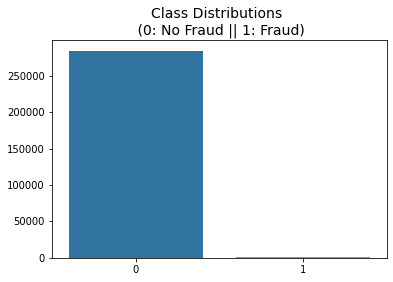

In [122]:
#@title
x=df['Class'].value_counts().values
sns.barplot([0,1],x)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

- There is clearly a class imbalace problem.
- We will look into methods of solving this issue later in this notebook.

In [271]:
df = df.drop(['Time', 'Amount'], axis=1)

# Imbalanced Dataset

In [ ]:
Suppose the professor gives you a 100 T/F questions as a final exam instead of an assignment. you should study hard, right?
But what if I tell you that 99 T and 1 F in advance? Is it still better to study? Or what else strategy is there?

Yes, of course, you will get better grades if you mark all the questions as true rather than studying hard and try to solve the questions.
So what type of the problem can be defined in this case?

- Most students (models) don't study.
- No matter who studies hard, they don't get good grades (they don't study)
- For professors, it is impossible to know who did well among the students.

## The metric trap 

One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.


    False Positive. Predict an event when there was no event.
    False Negative. Predict no event when in fact there was an event.

   In the overview of the problem statement the organizers has described a situation where you stand at the queue for a long time and when your chance arrives,the transaction gets denied because it was interpreted as a Fraudulent transaction which many of us have faced.
 This is classical example of **False Negative** prediction.
 


**Change the performance metric**

As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:


In [125]:
# naive classifier
def naive_classify(X_train):
    # we don't care X_train dataset. Just predict everything as 'NotFraud'
    y_pred = np.array([0] * X_train.shape[0])
    return y_pred

In [126]:
from sklearn.metrics import accuracy_score

y_true_naive = df['Class'].values
# print(y_true.shape)
x_t = df.drop(['Class'], axis=1).values
y_pred_naive = naive_classify(x_t)
print(accuracy_score(y_true_naive, y_pred_naive))

0.9982725143693799


## New evaluation metric

<h3>Terms:<h3>

True Positives: Correctly Classified Fraud Transactions

False Positives: Incorrectly Classified Fraud Transactions (오탐지)

True Negative: Correctly Classified Non-Fraud Transactions

False Negative: Incorrectly Classified Non-Fraud Transactions (미탐지)



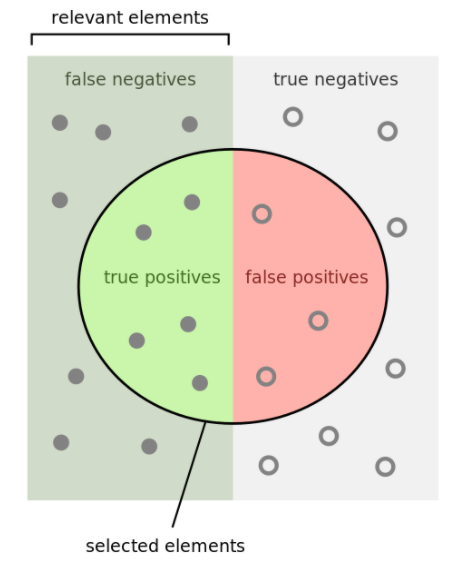

In [ ]:
"""
이 그림은 실제 데이터셋 네모 안에서 모델이 예측한 결과 동그라미를 나타낸다. 

보면 모델이 제대로 예측한 것과 예측하지 못한 것들이 존재하는데, 우리는 이걸 4가지로 구분할 수 있다. 


"""

Precision: True Positives/(True Positives + False Positives)

Recall: True Positives/(True Positives + False Negatives)

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.


**Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.
    
**Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    
**Recall**: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    
**F1 Score**: the weighted average of precision and recall. (harmonic average)
    

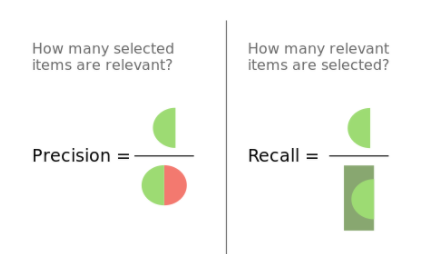

In [ ]:
"""
r fn 관련 있는 것 중 얼마나 모델이 선택했냐
how many fraud is selected by model 
p fp 모델이 선택한 것 중에 관련이 있는 것이 얼마나 있냐
how many fraud prediction from model is actually fraud
"""

In [127]:
from sklearn.metrics import classification_report

y_true_naive = df['Class'].values
# print(y_true.shape)
x_t = df.drop(['Class'], axis=1).values
y_pred_naive = naive_classify(x_t)
print(classification_report(y_true_naive, y_pred_naive, target_names=['NotFraud', 'Fraud'], digits=4))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    NotFraud     0.9983    1.0000    0.9991    284315
       Fraud     0.0000    0.0000    0.0000       492

    accuracy                         0.9983    284807
   macro avg     0.4991    0.5000    0.4996    284807
weighted avg     0.9965    0.9983    0.9974    284807



##Splitting to train and test


In [239]:
#@title
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               random_state=1,
                                               stratify=y.to_numpy())

fraud_X_train = X_train.values
fraud_X_test = X_test.values
fraud_y_train = y_train.values
fraud_y_test = y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(fraud_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(fraud_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(fraud_y_train))
print(test_counts_label/ len(fraud_y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [240]:
X_train.shape

(227845, 30)

In [241]:
y_train.shape

(227845,)

In [242]:
type(fraud_y_test)

numpy.ndarray

# Dealing with imbalanced dataset


<h3> Resampling </h3>

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

## Resampling Techniques using sklearn

In [243]:
from sklearn.utils import resample

<div align='left'><font size='4' color=' #6c3483'> 1.Oversample minority class </font></div>


Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

In [244]:
X=pd.concat([X_train,y_train],axis=1)

not_fraud=X[X.Class==0]
fraud=X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

Text(0, 0.5, 'count')

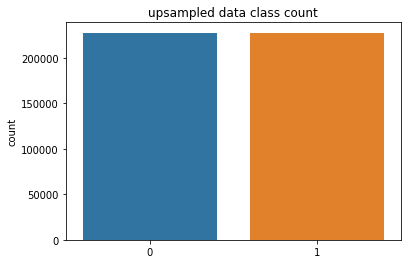

In [245]:
y=upsampled.Class.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

<div align='left'><font size='4' color=' #6c3483'>  2. Undersample majority class </font></div>


Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.



In [246]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    394
0    394
Name: Class, dtype: int64

Text(0, 0.5, 'count')

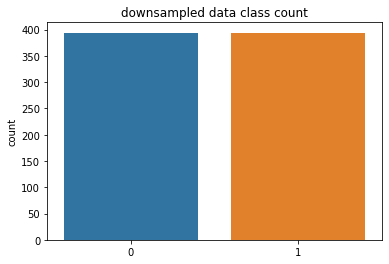

In [247]:
y=downsampled.Class.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

# Exercise 1. Build simple pytorch training funtion 

In [249]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

def train_NN(X_train, y_train, X_test, y_test):
    """
    params X_train, y_train, X_test, y_test (array-like): numpy array type dataset

        - It is simple dataset so you don't need to build "class Dataset"
          use torch.utils.data.TensorDataset after tensorize your data

        - your model's first layer should have same size with input feautures 
          (we call this variable as input_dim or input_size)

        - print 'loss of every epoch, and classification report' 
    
    return nothing (void)
    """
    tensorx = torch.tensor(X_train, dtype=torch.float)
    tensory = torch.tensor(y_train, dtype=torch.float)

    ds = TensorDataset(tensorx, tensory)
    dl = DataLoader(ds, batch_size=256, shuffle=True)

    input_size = tensorx.size(1)
    
    model = nn.Sequential(nn.Linear(input_size, 256),
                          nn.ReLU(),
                          nn.Dropout(),
                          nn.Linear(256, 64),
                          nn.ReLU(),
                          nn.Dropout(),
                          nn.Linear(64, 16),
                          nn.ReLU(),
                          nn.LayerNorm(16),
                          nn.Dropout(),
                          nn.Linear(16, 1),
                          nn.Sigmoid())
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-3)

    n_epoch = 5
    for ep in range(n_epoch):
        loss_total = 0
        for x_batch, y_batch in dl:
            pred = model(x_batch)
            # print(f"x_batch {x_batch.shape} y {y_batch.shape}")
            loss = criterion(pred.squeeze(), y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_total += loss
        print(f"{ep} epoch loss {loss_total / len(dl)}")
    
    xt = torch.tensor(X_test, dtype=torch.float)
    y_pred = model(xt)
    y_pred = np.array([1 if pred > 0.5 else 0 for pred in y_pred.detach().squeeze().tolist()])
    print(classification_report(y_test, y_pred, target_names=['NotFraud', 'Fraud'], digits=4))


In [250]:
train_NN(upsampled.drop(['Class'], axis=1).to_numpy(), upsampled['Class'].to_numpy(),  fraud_X_test, fraud_y_test)

0 epoch loss 0.025090090930461884
1 epoch loss 0.009696544148027897
2 epoch loss 0.008632912300527096
3 epoch loss 0.008170575834810734
4 epoch loss 0.007922828197479248
              precision    recall  f1-score   support

    NotFraud     0.9998    0.9971    0.9985     56864
       Fraud     0.3504    0.9082    0.5057        98

    accuracy                         0.9969     56962
   macro avg     0.6751    0.9526    0.7521     56962
weighted avg     0.9987    0.9969    0.9976     56962



In [251]:
train_NN(not_fraud_downsampled.drop(['Class'], axis=1).to_numpy(), not_fraud_downsampled['Class'].to_numpy(),  fraud_X_test, fraud_y_test)

0 epoch loss 0.24467238783836365
1 epoch loss 0.1447943150997162
2 epoch loss 0.10865244269371033
3 epoch loss 0.09105587750673294
4 epoch loss 0.080430768430233
              precision    recall  f1-score   support

    NotFraud     0.9983    0.9612    0.9794     56864
       Fraud     0.0014    0.0306    0.0026        98

    accuracy                         0.9596     56962
   macro avg     0.4998    0.4959    0.4910     56962
weighted avg     0.9965    0.9596    0.9777     56962



# New dataset

<class 'numpy.ndarray'>


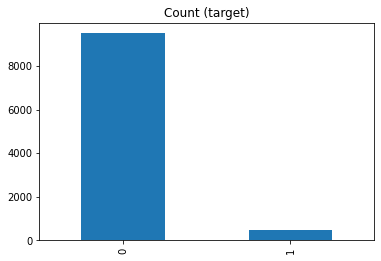

In [252]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, n_features=20, weights=[0.95, 0.05], n_samples=10000,
    n_informative=3, class_sep=2.0, flip_y=0, random_state=10
)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               random_state=1,
                                               stratify=y)
print(type(X))
ndf = pd.DataFrame(X)
ndf['target'] = y
ndf.target.value_counts().plot(kind='bar', title='Count (target)')

In [253]:
def plot_2d_space(X_train, y_train,X=X,y=y,label='Classes', scale=2):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(8,4))
   
    for l, c, m in zip(np.unique(y), colors, markers):
        ax1.scatter(
            X_train[y_train==l, 0],
            X_train[y_train==l, 1],
            c=c, label=l, marker=m, s=scale
        )
    for l, c, m in zip(np.unique(y), colors, markers):
        ax2.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=scale
        )
   
    ax1.set_title(label)
    ax2.set_title('fraud data')
    plt.legend(loc='upper right')
    plt.show()



## Python imbalanced-learn module



Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.


In [254]:
import imblearn

<div align='left'><font size='4' color=' #6c3483'>  Random under-sampling  with imbalanced-learn </font></div>



The number of removed indices are  800


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


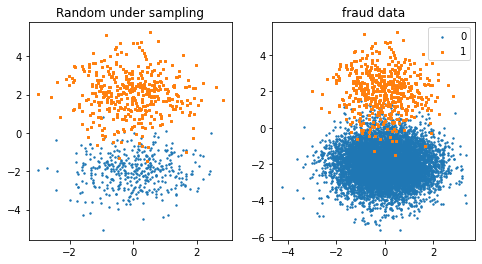

In [255]:
from imblearn.under_sampling import RandomUnderSampler

ran=RandomUnderSampler(return_indices=True) ##intialize to return indices of dropped rows
X_rus,y_rus,dropped = ran.fit_sample(X_train,y_train)

print("The number of removed indices are ",len(dropped))
plot_2d_space(X_rus,y_rus,X,y,'Random under sampling')

- Let's try fit and predict on this data and observe the outcome.

<div align='left'><font size='4' color=' #6c3483'>  Random over-sampling  with imbalanced-learn </font></div>



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The new data contains 15200 rows 


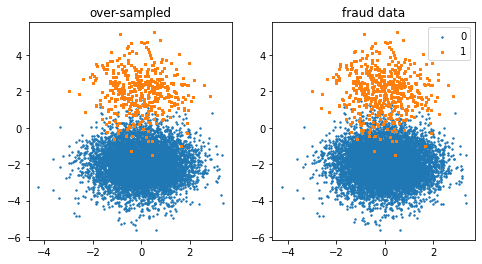

In [256]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
X_ros,y_ros= ran.fit_resample(X_train,y_train)

print('The new data contains {} rows '.format(X_ros.shape[0]))

plot_2d_space(X_ros,y_ros,X,y,'over-sampled')


## Under-sampling: Tomek links

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(10000, 20)
(7994, 20)
Remaining indices: 7994


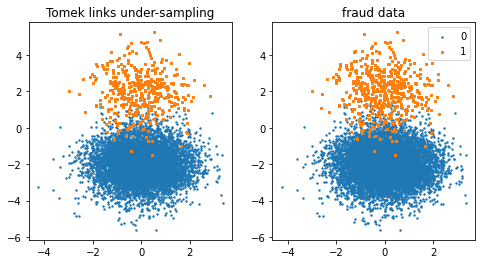

In [257]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train,y_train)
print(X.shape)
print(X_tl.shape)

print('Remaining indices:', len(id_tl))

plot_2d_space(X_tl, y_tl,X,y, 'Tomek links under-sampling')

## Over-sampling: SMOTE







SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


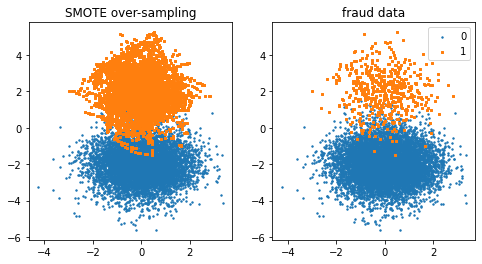

In [258]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

plot_2d_space(X_sm, y_sm,X,y, 'SMOTE over-sampling')

In [ ]:
Let's try fit and predict on this data and observe the outcome.

# Exercise 2. Test sampling techniques by your own model.

In [260]:
train_NN(X_rus, y_rus, X_test, y_test)

0 epoch loss 0.2552854120731354
1 epoch loss 0.2137138545513153
2 epoch loss 0.1961638182401657
3 epoch loss 0.15775355696678162
4 epoch loss 0.1357286423444748
              precision    recall  f1-score   support

    NotFraud     0.9925    0.9079    0.9483      1900
       Fraud     0.3321    0.8700    0.4807       100

    accuracy                         0.9060      2000
   macro avg     0.6623    0.8889    0.7145      2000
weighted avg     0.9595    0.9060    0.9249      2000



In [261]:
train_NN(X_ros, y_ros, X_test, y_test)

0 epoch loss 0.09070645272731781
1 epoch loss 0.027772750705480576
2 epoch loss 0.018935147672891617
3 epoch loss 0.014761491678655148
4 epoch loss 0.01256021298468113
              precision    recall  f1-score   support

    NotFraud     0.9979    0.9863    0.9921      1900
       Fraud     0.7869    0.9600    0.8649       100

    accuracy                         0.9850      2000
   macro avg     0.8924    0.9732    0.9285      2000
weighted avg     0.9873    0.9850    0.9857      2000



In [262]:
train_NN(X_tl, y_tl, X_test, y_test)

0 epoch loss 0.08096705377101898
1 epoch loss 0.05247274786233902
2 epoch loss 0.05038968846201897
3 epoch loss 0.048193808645009995
4 epoch loss 0.04117647930979729
              precision    recall  f1-score   support

    NotFraud     0.9596    0.9995    0.9791      1900
       Fraud     0.9524    0.2000    0.3306       100

    accuracy                         0.9595      2000
   macro avg     0.9560    0.5997    0.6548      2000
weighted avg     0.9592    0.9595    0.9467      2000



In [263]:
train_NN(X_sm, y_sm, X_test, y_test)

0 epoch loss 0.09605482965707779
1 epoch loss 0.024626020342111588
2 epoch loss 0.014445969834923744
3 epoch loss 0.010419757105410099
4 epoch loss 0.008607820607721806
              precision    recall  f1-score   support

    NotFraud     0.9979    0.9963    0.9971      1900
       Fraud     0.9320    0.9600    0.9458       100

    accuracy                         0.9945      2000
   macro avg     0.9650    0.9782    0.9715      2000
weighted avg     0.9946    0.9945    0.9945      2000



# THINKING - Apply it to what we have learned

## Image Data Augmentation

Can be treated as oversampling techniques

In [ ]:
torchvision.transforms 

A = transforms.Compose(
        [transforms.RandomResizedCrop(224),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])

B = transforms.Compose(
        [transforms.CenterCrop(10),
         transforms.RandomAffine(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])

data1 = datasets.ImageFolder(root=root_path + dir, transform=A)
data2 = datasets.ImageFolder(root=root_path + dir, transform=B)

## Text Data Augmentation

In [ ]:
!pip install textaugment >> /dev/null 2>&1

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textaugment import Wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
ex = 'In the afternoon, John is going to town'

In [ ]:
t = Wordnet(v=True ,n=True, p=0.9)
t.augment(ex)

'in the afternoon, john equal travel to township'

# Question


In [266]:
# 1. 딥러닝 모델들은 high variance? high bias?
#     - high variance, low bias 니깐 
# 2. 딥러닝 모델들은 왜 cross validation 안할까?
#     - 그러면 딥러닝 모델을 k fold 횟수만큼 선언하고 그만큼 훈련하고 평가해야하기 때문에 너무 큰 비용이듬
#     - 비슷한 이유로 앙상블도 처음부터 쓰이진 않음
# 3. 우리가 많이 배운 이미지, 텍스트는 sampling 기법 어떻게 적용할 수 있을까?
#     - 이미지는 대부분의 sampling 기법 적용가능한 것으로 알고잇음.
#     - 텍스트는 할거면 instance(doc, sentence, etc) 를 각각 임베딩해서 사용해야 할듯
# 4. 주의해야할 점?
# 5. 왜 sub sampling 을 해야하냐 
#     -  https://www.quora.com/In-Machine-Learning-why-do-we-always-train-a-sample-rather-than-the-whole-dataset-database
#     다하면 물론 좋은데 memory, computation cost
#     -  credit-fraud-dealing-with-imbalanced-datasets.ipynb
#     overfitting 이나 wrong corr 문제가 있어서
